In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv('data/product-details.csv', index_col=['productID'])
# df['n_reviews'] = df.pop('productId')
# df.index.name = 'productID'
# df.to_csv('data/product-details.csv')
df.head()

,product_price,ratingValue,material,brand,n_masks,age,n_reviews
productID,,,,,,,
99829,6821.76,45.361842,other,Kosette,1,269,304.0
99830,10659.00,45.326316,other,Kosette,1,270,475.0
100099,2034.01,34.878049,other,Luseta Beauty,50,253,41.0
100234,2171.19,39.387755,other,Luseta Beauty,50,241,49.0
100237,9391.60,42.283019,cotton,Kitsch,3,225,530.0


In [24]:
plt.style.use('ggplot')

Text(0.5, 0.98, 'High Product Rating ≠ High Sales')

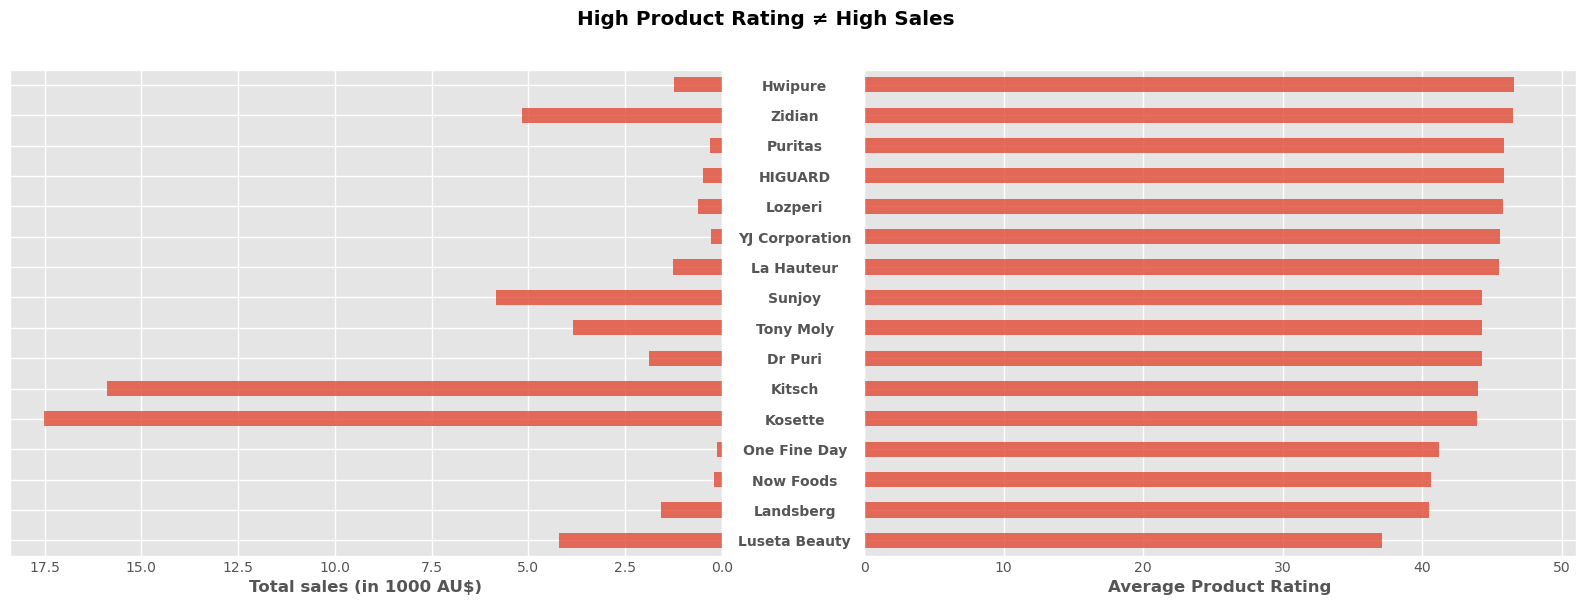

In [54]:


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
g = df.groupby('brand')['ratingValue'].mean().sort_values()
g.plot(kind='barh', ax=ax[1], alpha=0.8)
h = df.groupby('brand')['product_price'].sum()[g.index] / 1000
ax[1].set_yticklabels(g.index, ha='center', weight='bold')
ax[1].tick_params(axis='y', pad=50)
ax[1].set_xlabel('Average Product Rating', weight='bold')
ax[1].set_ylabel('')
ax[1].set_xlim(0, 51)
h.plot(kind='barh', ax=ax[0], alpha=0.8)
ax[0].set_ylabel('')
ax[0].set_yticklabels([])
ax[0].set_xlabel('Total sales (in 1000 AU$)', weight='bold')
ax[0].invert_xaxis()
plt.suptitle('High Product Rating ≠ High Sales', weight='heavy', size='x-large')

In [59]:
top_brands = g.sort_values(ascending=False).head().index.union(h.sort_values(ascending=False).head().index)

In [60]:
top_brands

Index(['HIGUARD', 'Hwipure', 'Kitsch', 'Kosette', 'Lozperi', 'Luseta Beauty',
       'Puritas', 'Sunjoy', 'Zidian'],
      dtype='object', name='brand')

In [61]:
tb = df[df['brand'].isin(top_brands)]
tb

,product_price,ratingValue,material,brand,n_masks,age,n_reviews
productID,,,,,,,
99829,6821.76,45.361842,other,Kosette,1,269,304.0
99830,10659.00,45.326316,other,Kosette,1,270,475.0
100099,2034.01,34.878049,other,Luseta Beauty,50,253,41.0
100234,2171.19,39.387755,other,Luseta Beauty,50,241,49.0
100237,9391.60,42.283019,cotton,Kitsch,3,225,530.0
101691,1896.04,44.579439,cotton,Kitsch,3,147,107.0
101692,4589.48,45.019305,cotton,Kitsch,3,144,259.0
101774,495.60,45.833333,other,HIGUARD,1,134,168.0
101955,5829.88,44.285714,other,Sunjoy,10,148,658.0


Text(15, 48.2, 'Lozperi')

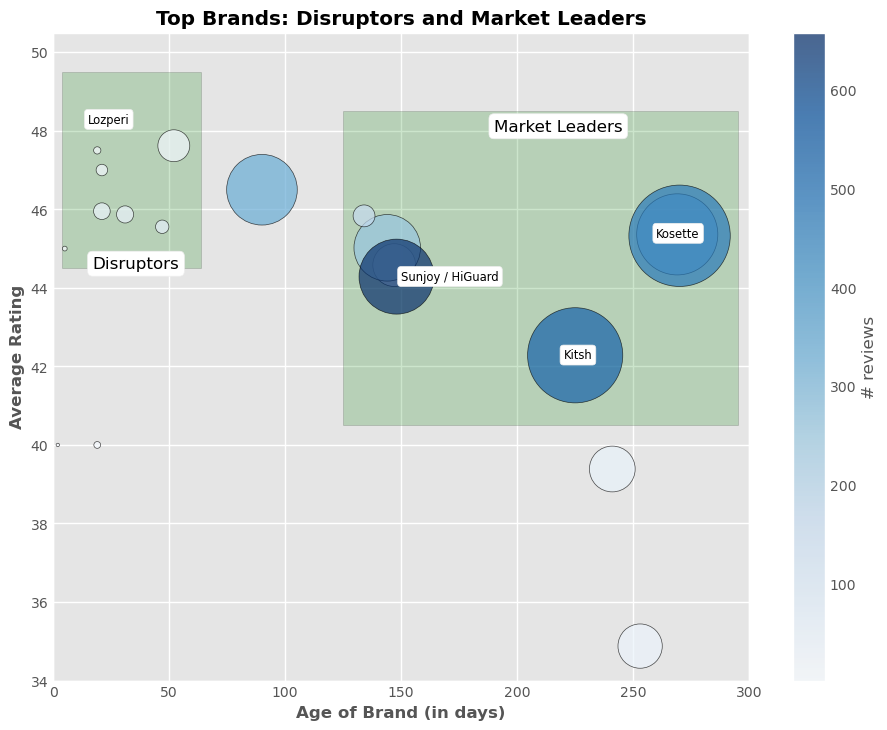

In [202]:
fig, ax = plt.subplots(figsize=(10, 8))

k = ax.scatter(tb['age'], tb['ratingValue'], s=tb['product_price'] / 2, c=tb['n_reviews'], alpha=0.7, cmap=plt.cm.Blues, ec='k', zorder=2)
ax.set_xlabel('Age of Brand (in days)', weight='bold')
ax.set_ylabel('Average Rating', weight='bold')
ax.set_xlim(0, 300)
ax.set_ylim(34, 50.5)

cbar = plt.colorbar(k, label='# reviews')
# cbar.ax.set_yticklabels(['Most Reviewed', 'Least Reviewed'])
_ = ax.set_title('Top Brands: Disruptors and Market Leaders', weight='heavy')


# Futher annotations
ax.add_patch(plt.Rectangle((125, 40.5), 170, 8, ec='k', fc='green', alpha=0.2, zorder=1))
ax.annotate('Market Leaders', xy=(190, 48), bbox={'boxstyle': 'round', 'fc': "1"}, fontsize='large')
ax.annotate('Kosette', xy=(260, 45.3), bbox={'boxstyle': 'round', 'fc': "1"}, fontsize='small')
ax.annotate('Kitsh', xy=(220, 42.2), bbox={'boxstyle': 'round', 'fc': "1"}, fontsize='small')
ax.annotate('Sunjoy / HiGuard', xy=(150, 44.2), bbox={'boxstyle': 'round', 'fc': "1"}, fontsize='small')

ax.add_patch(plt.Rectangle((3.8, 44.5), 60, 5, ec='k', fc='green', alpha=0.2, zorder=1))
ax.annotate('Disruptors', xy=(17, 44.5), bbox={'boxstyle': 'round', 'fc': "1"}, fontsize='large')
ax.annotate('Lozperi', xy=(15, 48.2), bbox={'boxstyle': 'round', 'fc': "1"}, fontsize='small')

In [170]:
leaders = tb[tb['age'] > 100]
leaders = leaders[leaders['ratingValue'] > 40]
leaders.sort_values('n_reviews', ascending=False)

,product_price,ratingValue,material,brand,n_masks,age,n_reviews
productID,,,,,,,
101955,5829.88,44.285714,other,Sunjoy,10,148,658.0
100237,9391.60,42.283019,cotton,Kitsch,3,225,530.0
99830,10659.00,45.326316,other,Kosette,1,270,475.0
99829,6821.76,45.361842,other,Kosette,1,269,304.0
101692,4589.48,45.019305,cotton,Kitsch,3,144,259.0
101774,495.60,45.833333,other,HIGUARD,1,134,168.0
101691,1896.04,44.579439,cotton,Kitsch,3,147,107.0


In [195]:
dis = tb[tb['age'] < 60]
dis[dis['ratingValue'] > 44]

,product_price,ratingValue,material,brand,n_masks,age,n_reviews
productID,,,,,,,
103204,1053.99,47.619048,other,Hwipure,25,52,21.0
103205,185.85,45.555556,other,Hwipure,1,47,63.0
103743,304.06,45.869565,other,Puritas,3,31,46.0
103838,287.70,45.952381,copper,Lozperi,1,21,42.0
103839,82.20,48.333333,copper,Lozperi,1,17,12.0
103840,137.00,47.000000,copper,Lozperi,1,21,20.0
103842,54.80,47.500000,copper,Lozperi,1,19,8.0
104022,23.62,45.000000,other,Kosette,3,5,2.0


In [196]:
tb[tb['brand'] == 'Lozperi']

,product_price,ratingValue,material,brand,n_masks,age,n_reviews
productID,,,,,,,
103838,287.70,45.952381,copper,Lozperi,1,21,42.0
103839,82.20,48.333333,copper,Lozperi,1,17,12.0
103840,137.00,47.000000,copper,Lozperi,1,21,20.0
103841,47.95,40.000000,copper,Lozperi,1,19,7.0
103842,54.80,47.500000,copper,Lozperi,1,19,8.0
